In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
np.random.seed(98)

In [43]:
train_data = np.genfromtxt('train.csv', delimiter=',', skip_header=1)
train_data.shape

(42000, 785)

In [44]:
x_train = train_data[:,1:]
y_train = train_data[:,0]

In [45]:
values, counts = np.unique(y_train, return_counts=True)
print(values, counts)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.] [4132 4684 4177 4351 4072 3795 4137 4401 4063 4188]


In [46]:
x_train.shape

(42000, 784)

In [47]:
x_train[0]

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

In [48]:
x_train = x_train.astype('float32')/255
y_train = np_utils.to_categorical(y_train)

In [49]:
x_train = np.reshape(x_train, (42000, 1, 28, 28))

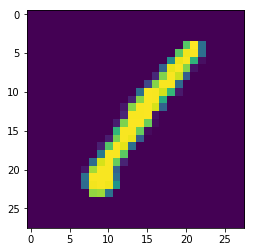

In [50]:
plt.imshow(x_train[0][0])

In [51]:
y_train[0]

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [52]:
print(x_train[0].shape, y_train[0].shape)

(1, 28, 28) (10,)


In [53]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape = (1, 28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 16, 26, 26)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 13, 13)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 13, 13)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               346240    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 347,690
Trainable params: 347,690
Non-trainable params: 0
_________________________________________________________________
None

In [54]:
model.fit(x_train, y_train, epochs = 5, batch_size = 10, verbose = 1)

Epoch 1/5
42000/42000 [==============================] - 54s - loss: 0.1971 - acc: 0.9388    
Epoch 2/5
42000/42000 [==============================] - 58s - loss: 0.0709 - acc: 0.9774    
Epoch 3/5
42000/42000 [==============================] - 58s - loss: 0.0461 - acc: 0.9856    
Epoch 4/5
42000/42000 [==============================] - 58s - loss: 0.0331 - acc: 0.9891    
Epoch 5/5
42000/42000 [==============================] - 56s - loss: 0.0243 - acc: 0.9920    


In [55]:
test_data = np.genfromtxt('test.csv', delimiter=',', skip_header=1)
test_data.shape

(28000, 784)

In [56]:
x_test = test_data.astype('float32')/255
x_test = np.reshape(x_test, (28000, 1, 28, 28))
print(x_test.shape)

(28000, 1, 28, 28)


In [57]:
results = np.argmax(model.predict(x_test), axis=1)
results.shape

(28000,)

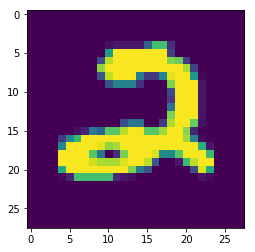

In [58]:
plt.imshow(x_test[0][0])

In [59]:
print(results[0])

2


In [60]:
df = pandas.DataFrame(data={"ImageId": range(1, len(results)+1), "Label": results})
df.to_csv("./results.csv", sep=',', index=False)